# Game of Life (an example of a class) and some reminders
---

A class for [Conway's game of life automaton](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life):

## But first some quick (?) reminders

### `*=` operator and bitwise logical operators

In [15]:
a = 1
a += 1 # a = a + 1
a *= 2 # a = a * 2
# | # bitwise or
print(f"{3 | 4 = }")
# 4 = 1 0 0 ; 3 = 0 1 1
# 4 | 3 = 1 1 1 = 7
print(f"{3 & (3 | 4) = }")
# 3 & (3 | 4) = ?
# (3 | 4) = 7 = 1 1 1
# 0 1 1 & 1 1 1 = 0 1 1
print(f"{3 ^ (3 | 4) = }")

3 | 4 = 7
3 & (3 | 4) = 3
3 ^ (3 | 4) = 4


### `np.ndarray` array manipulation

`np.ndarray`s are `n` dimentional arrays that are very effictient to manipulate.

It can be worth remembering some of their properties:

#### Array creation

In [57]:
## Importing numpy:
import numpy as np

## Creating a ndarray filled with 0s of dimension 10 by 5:
arr0 = np.zeros((10, 5))

## Creating a ndarray filled with 1s of dimension 3 by 6 by 2:
arr1 = np.ones((3, 6, 2))

## Creating an array with ordered numbers from 0 to 11:
arr = np.arange(12)
# -> [ 0  1  2  3  4  5  6  7  8  9 10 11]

## Rearanging the previsous array as a 3 by 4 array:
arr = arr.reshape(3, 4)
# -> [[ 0  1  2  3]
#     [ 4  5  6  7]
#     [ 8  9 10 11]]

## Rearanging the previsous array as a 3 by 4 array:
arr = arr.reshape(3, 2, 2)
# -> [[[ 0  1]
#      [ 2  3]]
#      
#     [[ 4  5]
#      [ 6  7]]
#      
#     [[ 8  9]
#      [10 11]]]

## Slicing an array
### Creating a larger array
arr = np.arange(200)
arr = arr.reshape(10, 5, -1)
# arr.shape -> (10, 5, 4)

#### Array slicing and access

In [ ]:
### Slicing the array
arr = arr[2:5, :-3, ::2]
# -> [[[40 42]
#      [44 46]]
#    
#     [[60 62]
#      [64 66]]
#    
#     [[80 82]
#      [84 86]]]

## Changing the values of an array
arr = np.arange(20)
arr = arr.reshape(5, 2, -1)

### change the value at position (4, 1, 0) to 1
arr[1, 1, 0] = -1

### change all the values of the 8th slice to 10
arr[3] = 10

### change the value of every other slice to 3 starting with the first one
arr[::2] = 3

# -> [[[ 3  3]
#      [ 3  3]]
#   
#     [[ 4  5]
#      [-1  7]]
#   
#     [[ 3  3]
#      [ 3  3]]
#   
#     [[10 10]
#      [10 10]]
#   
#     [[ 3  3]
#      [ 3  3]]]

#### Array masking

In [70]:
arr = np.arange(200)
arr = arr.reshape(10, 5, -1)

mask = arr%3==1
# -> mask[i] == True where the rest of the whole division of arr[i] by 3 is 1.

# masking the original array, returns a view on the orginal array where mask is True.
arr[mask]
# -> [  1   4   7  10  13  16  19  22  25  28  31  34  37  40  43  46  49  52
#      55  58  61  64  67  70  73  76  79  82  85  88  91  94  97 100 103 106
#     109 112 115 118 121 124 127 130 133 136 139 142 145 148 151 154 157 160
#     163 166 169 172 175 178 181 184 187 190 193 196 199]

# Setting all values where the mask is true to 0 in the table 
arr[mask] = 0


#### Array operations

In [109]:
arr = np.arange(20)
arr = arr.reshape(5, 4)

## adding/substracting/multiplying/... a scalar to all cell of the array:
arr1 = arr + 1
arr2 = arr * 2
arr3 = arr ** 3
arr4 = arr // 3

## pairwise addition/multiplication/... between arrays
arr_sum = arr1 + arr2
arr_mult = arr2 * arr1
arr_mod = arr_mult % arr1
### Guess what are the values of `arr_mod`

## Matrix multiplication/dot product
arr_dot1 = arr1 @ arr2.T
### or
arr_dot2 = np.dot(arr1, arr2.T)
### or
arr_dot3 = arr1.dot(arr2.T)
(arr_dot1 == arr_dot2).all(), (arr_dot2 == arr_dot3).all()
### CAREFUL HERE, THE @ IS EQUIVALENT TO `dot` ONLY IN 1 AND 2D

(True, True)

### Image convolution in computer vision

A continuous convolution between two function $f$ and $g$ can generally be characterised mathematically as follow:
$$ (f\ast g)(x) = \int_{-\infty}^{\infty} f(x-\tau) . g(\tau)d\tau$$

In our specific case, we are more intereseted in discrete convolution between a bounded 2D image $I$ and a bounded 2D kernel $K$ of size $N\times M$.

In that case the equation can be writen as follow:
$$
(I\ast K)(x, y) = \sum_{i=-\left\lfloor\frac{N}{2}\right\rfloor}^{\left\lfloor\frac{N}{2}\right\rfloor}
\sum_{j=-\left\lfloor\frac{M}{2}\right\rfloor}^{\left\lfloor\frac{M}{2}\right\rfloor} I(x+i,y+j).K(i, j)
$$


Let see what it means on an example:

<img src="../Images/Gauss.png" alt="Diffusion" width="500"/>

Now, if we carefully choose our kernel and, if we have a binary image we can get this kind of convolution:

<img src="../Images/Neighbs.png" alt="Diffusion" width="500"/>

Can you guess what it does?

## Now, an example of a Conway's Game of Life class in python

In [4537]:
from scipy.signal import convolve2d
import numpy as np
import matplotlib.pyplot as plt

class GameOfLife:
    # That Kernel defines how to count the number of neighbors
    kernel = np.array([
        [1, 1, 1],
        [1, 0, 1],
        [1, 1, 1]
    ])
    boundary = "wrap"

    def iterations(self, nb_iter=1):
        """
        Run one iteration of the automaton and update the current state with its new value

        Args:
            nb_iter (int): specify how many iterations have to be ran (default 1)
        """
        for _ in range(nb_iter):
            # Counting the neighbors
            # Changing the boundary parameter will change the behavior of the game of life.
            nb_neighbs = convolve2d(self.current_state, self.kernel, boundary=self.boundary, mode='same')
            
            # Checking the rules:
            #   Any live cell with two or three live neighbours survives.
            new_live  = ((nb_neighbs == 3) | (nb_neighbs == 2)) & self.current_state
            
            #   Any dead cell with three live neighbours becomes a live cell.
            new_live |= ((nb_neighbs == 3) & (~self.current_state))
            #   All other live cells die in the next generation. Similarly, all other dead cells stay dead.
            self.current_state = new_live
    
    def plot(self):
        """
        Plot the current state of the automaton
        """
        if isinstance(self, GameOfLife):
            image = self.current_state
        else:
            image = self
        fig, ax = plt.subplots()
        ax.imshow(image, interpolation='nearest', cmap="gray")
        ax.set_xticks([])
        ax.set_yticks([])
        fig.tight_layout()
        plt.show()

    def __init__(self, initial_state, boundary=None):
        self.initial_state = initial_state
        self.current_state = initial_state
        if boundary:
            self.boundary = boundary

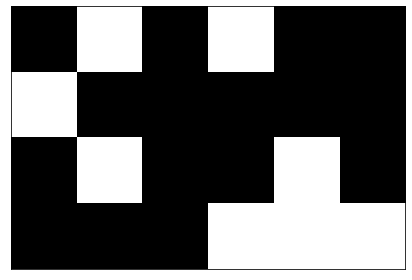

In [4538]:
init_state = np.array(
    [
        [0, 1, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 0],
        [0, 0, 0, 1, 1, 1]
    ], dtype=int
)
GameOfLife.plot(init_state)

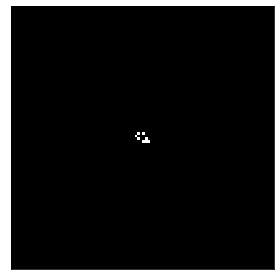

In [4539]:
size = 100
init_state_large = np.zeros((size, size), dtype=bool)
init_state_large[size//2-2:size//2+2, size//2-3:size//2+3] = init_state
game_of_life = GameOfLife(init_state_large, boundary="wrap")
game_of_life.plot()

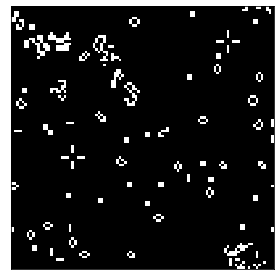

In [4739]:
game_of_life.iterations(10)
game_of_life.plot()

In [4740]:
class GameOfLifeGeneral(GameOfLife):
    def iterations(self, nb_iter=1):
        """
        Run one iteration of the automaton and update the current state with its new value

        Args:
            nb_iter (int): specify how many iterations have to be ran (default 1)
        """
        for _ in range(nb_iter):
            # Counting the number of neighbors
            # Changing the boundary parameter will 
            nb_neighbs = convolve2d(self.current_state, self.kernel, boundary=self.boundary, mode='same')
            
            new_live = np.zeros_like(nb_neighbs, dtype=bool)
            # Checking the rules:
            #   Any live cell with two or three live neighbours survives.
            for th in self.th_live:
                new_live |= (nb_neighbs == th) & self.current_state
            #   Any dead cell with three live neighbours becomes a live cell.
            for th in self.th_dead:
                new_live |= ((nb_neighbs == th) & (~self.current_state))
            #   All other live cells die in the next generation. Similarly, all other dead cells stay dead.
            self.current_state = new_live

    def __init__(self, initial_state, boundary=None, th_live=[2, 3], th_dead=[3]):
        super().__init__(initial_state, boundary=boundary)
        if not hasattr(th_live, "__iter__"):
            th_live = [th_live]
        if not hasattr(th_dead, "__iter__"):
            th_live = [th_dead]
        self.th_live = th_live
        self.th_dead = th_dead

In [5113]:
size = 300
init_state_large = np.zeros((size, size), dtype=bool)
init_state_large[size//3-2:size//3+2, size//3-3:size//3+3] = init_state
game_of_life2 = GameOfLifeGeneral(init_state_large, th_live=[1, 2, 3, 4, 5], th_dead=[3], boundary="wrap")

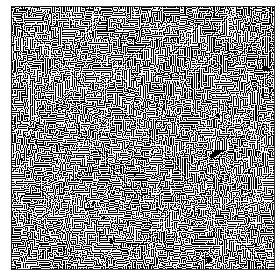

In [5184]:
game_of_life2.iterations(10)
game_of_life2.plot()

In [5194]:
total_iter = 700
nb_tp = 100
incr = total_iter//nb_tp
game_of_life2 = GameOfLifeGeneral(init_state_large, th_live=[1, 2, 3, 4, 5], th_dead=[3], boundary="wrap")
output = np.zeros(init_state_large.shape + (nb_tp,), dtype="uint8")
for i in range(nb_tp):
    output[..., i] = game_of_life2.current_state
    game_of_life2.iterations(incr)


In [5196]:
## Need to have installed tifffile for that part:
## `pip install tifffile`
from tifffile import imwrite
imwrite("GoLMaze.tif", output.T)